In [2]:
import os
gtkbin = r'C:\Program Files\GTK3-Runtime Win64\bin'
os.environ['PATH'] = os.pathsep.join((gtkbin, os.environ['PATH']))

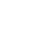

In [6]:
import cairosvg
from xml.etree import ElementTree
import IPython.display as display
from PIL import Image
from io import BytesIO

def create_animation_frames(svg_content, output_folder, num_frames=10):
    frames = []
    root = ElementTree.fromstring(svg_content)
    for i in range(num_frames):
        # Calculate opacity
        opacity = 1 - abs(0.5 - i / (num_frames - 1)) * 2

        # Set the opacity in the root element's style attribute
        root.set('style', f'opacity: {opacity}; fill: white;')

        # Convert back to string and then to PNG
        modified_svg = ElementTree.tostring(root).decode()
        png_data = cairosvg.svg2png(bytestring=modified_svg.encode())

        # Convert the modified SVG to PNG
        # png_path = f"{output_folder}/frame_{i:02d}.png"
        png_path = f"{output_folder}/frame_{i}.png"
        cairosvg.svg2png(bytestring=modified_svg.encode(), write_to=png_path, output_width=46, output_height=46)

        frames.append(Image.open(BytesIO(png_data)))

    return frames

# Load your SVG content
svg_path = r"C:\Users\Zhangty\Downloads\svgs\explore-96.svg"  # Replace with your actual SVG file path
with open(svg_path, 'r') as file:
    svg_content = file.read()

# Generate animation frames
frames = create_animation_frames(svg_content, output_folder="./explore-46-anim", num_frames=30)

# Save the frames as a GIF and display it in the notebook
gif_path = './animation.gif'  # Replace with your output GIF path
frames[0].save(gif_path, save_all=True, append_images=frames[1:], optimize=False, duration=200, loop=0)
display.Image(filename=gif_path)
